## DEBUG 2 -  Dead pixels & co.

In [72]:

from scipy.ndimage import median_filter
import numpy as np
import tifffile as tiff

import matplotlib.pylab as plt 
%matplotlib inline

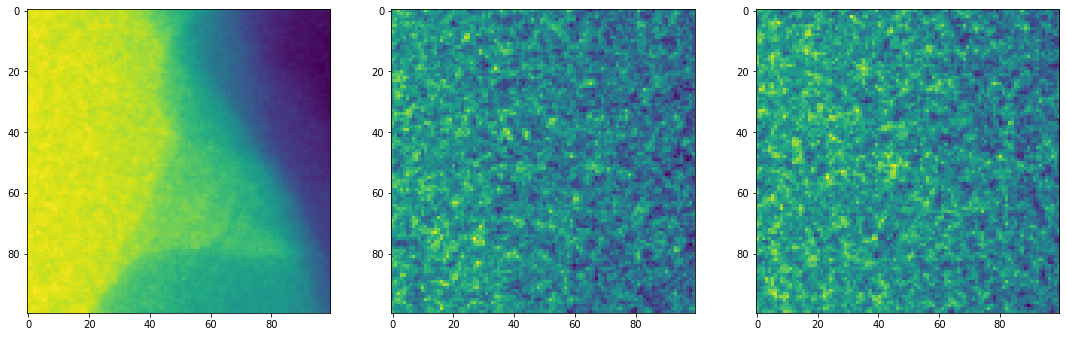

In [73]:
img0 = tiff.imread('H:\\Fanti_Muscioni\\Y3_Xm45\\out\\tomo_0606.tif')

fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
fig.set_size_inches(18.5, 10.5)
ax1.imshow(img0[450:550,450:550])
ax2.imshow(img0[600:700,100:200])
ax3.imshow(img0[700:800,0:100])

In [70]:
def find_outlier_pixels(data,thr = 2, worry_about_edges=True):
    #This function finds the hot or dead pixels in a 2D dataset. 
    #tolerance is the number of standard deviations used to cutoff the hot pixels
    #If you want to ignore the edges and greatly speed up the code, then set
    #worry_about_edges to False.
    #
    #The function returns a list of hot pixels and also an image with with hot pixels removed

    
    blurred = median_filter(data, size=thr)
    difference = data - blurred
    threshold = 10*np.std(difference)

    #find the hot pixels, but ignore the edges
    hot_pixels = np.nonzero((np.abs(difference[1:-1,1:-1])>threshold) )
    hot_pixels = np.array(hot_pixels) + 1 #because we ignored the first row and first column

    fixed_image = np.copy(data) #This is the image with the hot pixels removed
    for y,x in zip(hot_pixels[0],hot_pixels[1]):
        fixed_image[y,x]=blurred[y,x]

    if worry_about_edges == True:
        height,width = np.shape(data)

        ###Now get the pixels on the edges (but not the corners)###

        #left and right sides
        for index in range(1,height-1):
            #left side:
            med  = np.median(data[index-1:index+2,0:2])
            diff = np.abs(data[index,0] - med)
            if diff>threshold: 
                hot_pixels = np.hstack(( hot_pixels, [[index],[0]]  ))
                fixed_image[index,0] = med

            #right side:
            med  = np.median(data[index-1:index+2,-2:])
            diff = np.abs(data[index,-1] - med)
            if diff>threshold: 
                hot_pixels = np.hstack(( hot_pixels, [[index],[width-1]]  ))
                fixed_image[index,-1] = med

        #Then the top and bottom
        for index in range(1,width-1):
            #bottom:
            med  = np.median(data[0:2,index-1:index+2])
            diff = np.abs(data[0,index] - med)
            if diff>threshold: 
                hot_pixels = np.hstack(( hot_pixels, [[0],[index]]  ))
                fixed_image[0,index] = med

            #top:
            med  = np.median(data[-2:,index-1:index+2])
            diff = np.abs(data[-1,index] - med)
            if diff>threshold: 
                hot_pixels = np.hstack(( hot_pixels, [[height-1],[index]]  ))
                fixed_image[-1,index] = med

        ###Then the corners###

        #bottom left
        med  = np.median(data[0:2,0:2])
        diff = np.abs(data[0,0] - med)
        if diff>threshold: 
            hot_pixels = np.hstack(( hot_pixels, [[0],[0]]  ))
            fixed_image[0,0] = med

        #bottom right
        med  = np.median(data[0:2,-2:])
        diff = np.abs(data[0,-1] - med)
        if diff>threshold: 
            hot_pixels = np.hstack(( hot_pixels, [[0],[width-1]]  ))
            fixed_image[0,-1] = med

        #top left
        med  = np.median(data[-2:,0:2])
        diff = np.abs(data[-1,0] - med)
        if diff>threshold: 
            hot_pixels = np.hstack(( hot_pixels, [[height-1],[0]]  ))
            fixed_image[-1,0] = med

        #top right
        med  = np.median(data[-2:,-2:])
        diff = np.abs(data[-1,-1] - med)
        if diff>threshold: 
            hot_pixels = np.hstack(( hot_pixels, [[height-1],[width-1]]  ))
            fixed_image[-1,-1] = med

    return fixed_image,hot_pixels


img, _ = find_outlier_pixels(img0)

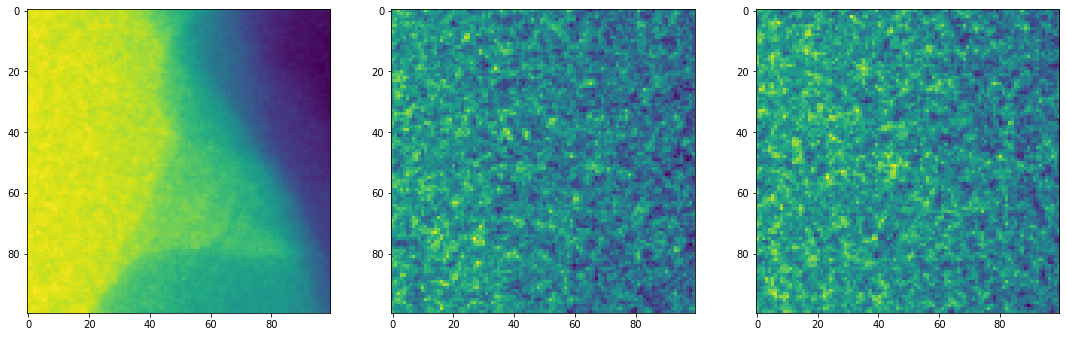

In [71]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
fig.set_size_inches(18.5, 10.5)
ax1.imshow(img0[450:550,450:550])
ax2.imshow(img0[600:700,100:200])
ax3.imshow(img0[700:800,0:100])

[[28397 28662]
 [27422 27502]]
[[42066 42091]
 [41985 41641]]
[[42834 42778]
 [42703 43550]]


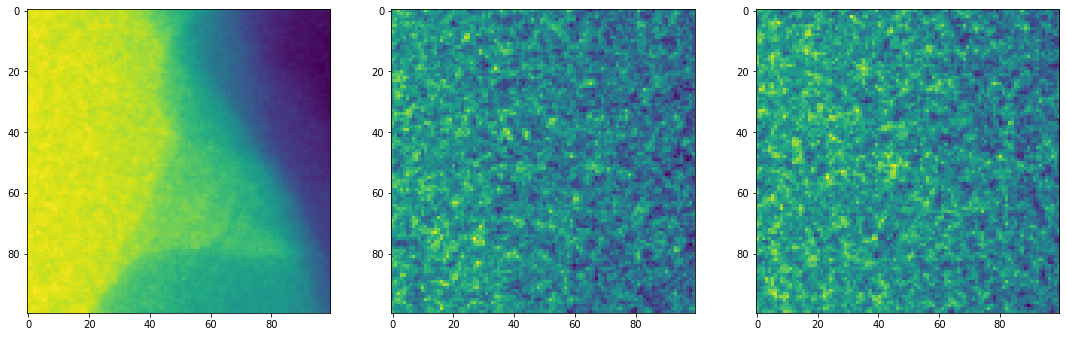

In [67]:
corrupt_pix_y = [532, 175, 74]
corrupt_pix_x = [513, 649, 743]
for j in range(0,len(corrupt_pix_x)):
    pos0 = corrupt_pix_x[j]
    pos1 = corrupt_pix_y[j]
    kernel_r = np.array([img0[pos0-1:pos0+1, pos1-1], img0[pos0-1:pos0+1,pos1+1]])
    print(kernel_r)
    img0[pos0, pos1] = np.median(kernel_r) 
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
fig.set_size_inches(18.5, 10.5)
ax1.imshow(img0[450:550,450:550])
ax2.imshow(img0[600:700,100:200])
ax3.imshow(img0[700:800,0:100])